# Support Vector Machine (HR/Employee Burnout Prediction)

## Explanation

### Objective

create a machine learning model that can predict whether an Employee/HR is experiencing Burnout or not, using the Support Vector Machine algorithm.

### Column Descriptions

- ***Name*** = Synthetic employee name (for realism, not for ML use).
- ***Age*** = Age of the employee.
- ***Gender*** = Male or Female.
- ***JobRole*** = Job type (Engineer, HR, Manager, etc.).
- ***Experience*** = Years of work experience.
- ***WorkHoursPerWeek*** = Average number of working hours per week.
- ***RemoteRatio*** = % of time spent working remotely (0–100).
- ***SatisfactionLevel*** = Self-reported satisfaction (1.0 to 5.0).
- ***StressLevel*** = Self-reported stress level (1 to 10).
- ***Burnout*** = Target variable. 1 if signs of burnout exist (high stress + low satisfaction + long hours), otherwise 0.

## A. Data Preparation

### A.1 Import Libraries

In [135]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### A.2 Load Data

In [136]:
try:
    df = pd.read_csv('synthetic_employee_burnout.csv')
    print("Berhasil Membaca Data")
except Exception as e:
    print("Gagal Membaca Data")

Berhasil Membaca Data


### A.3 Viewing Data Dimensions

In [137]:
df.shape

(2000, 10)

### A.4 Viewing Data Informations

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               2000 non-null   object 
 1   Age                2000 non-null   int64  
 2   Gender             2000 non-null   object 
 3   JobRole            2000 non-null   object 
 4   Experience         2000 non-null   int64  
 5   WorkHoursPerWeek   2000 non-null   int64  
 6   RemoteRatio        2000 non-null   int64  
 7   SatisfactionLevel  2000 non-null   float64
 8   StressLevel        2000 non-null   int64  
 9   Burnout            2000 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 156.4+ KB


### A.5 Viewing Data Statistics

In [139]:
df.describe().T.style.format("{:.2f}").background_gradient(cmap='flare')

,count,mean,std,min,25%,50%,75%,max
Age,2000.00,40.69,11.29,22.00,31.00,41.00,50.00,60.00
Experience,2000.00,10.07,9.15,0.00,3.00,7.00,15.00,39.00
WorkHoursPerWeek,2000.00,49.59,11.83,30.00,39.00,49.00,60.00,70.00
RemoteRatio,2000.00,49.97,29.15,0.00,24.00,49.00,75.00,100.00
SatisfactionLevel,2000.00,3.00,1.16,1.00,2.00,3.02,4.00,5.00
StressLevel,2000.00,5.43,2.88,1.00,3.00,5.00,8.00,10.00
Burnout,2000.00,0.06,0.25,0.00,0.00,0.00,0.00,1.00


### A.6 Viewing Top 5 Data and Bottom 5 Data

In [140]:
df.head()

,Name,Age,Gender,JobRole,Experience,WorkHoursPerWeek,RemoteRatio,SatisfactionLevel,StressLevel,Burnout
0,Max Ivanov,32,Male,Analyst,3,60,21,4.40,1,0
1,Max Wang,40,Female,Engineer,9,47,67,2.09,2,0
2,Nina Petrov,33,Female,Engineer,2,44,20,2.58,3,0
3,John Ivanov,35,Female,Manager,6,44,70,3.23,8,0
4,John Wang,59,Male,Sales,8,38,46,4.41,1,0


In [141]:
df.tail()

,Name,Age,Gender,JobRole,Experience,WorkHoursPerWeek,RemoteRatio,SatisfactionLevel,StressLevel,Burnout
1995,Leo Brown,41,Female,Manager,4,63,17,3.40,4,0
1996,Alex Brown,23,Female,HR,2,39,20,4.67,9,0
1997,Nina Wang,31,Female,HR,10,39,4,4.10,4,0
1998,Kate Lee,25,Male,HR,0,40,57,2.11,4,0
1999,Lily Petrov,49,Female,Engineer,13,65,22,4.36,8,0


### A.7 Viewing Duplicated Data

In [142]:
df.duplicated().sum()

np.int64(0)

### A.8 Viewing Missing Data

In [143]:
df.isna().sum()

Name                 0
Age                  0
Gender               0
JobRole              0
Experience           0
WorkHoursPerWeek     0
RemoteRatio          0
SatisfactionLevel    0
StressLevel          0
Burnout              0
dtype: int64

### A.9 Viewing Outlier Data

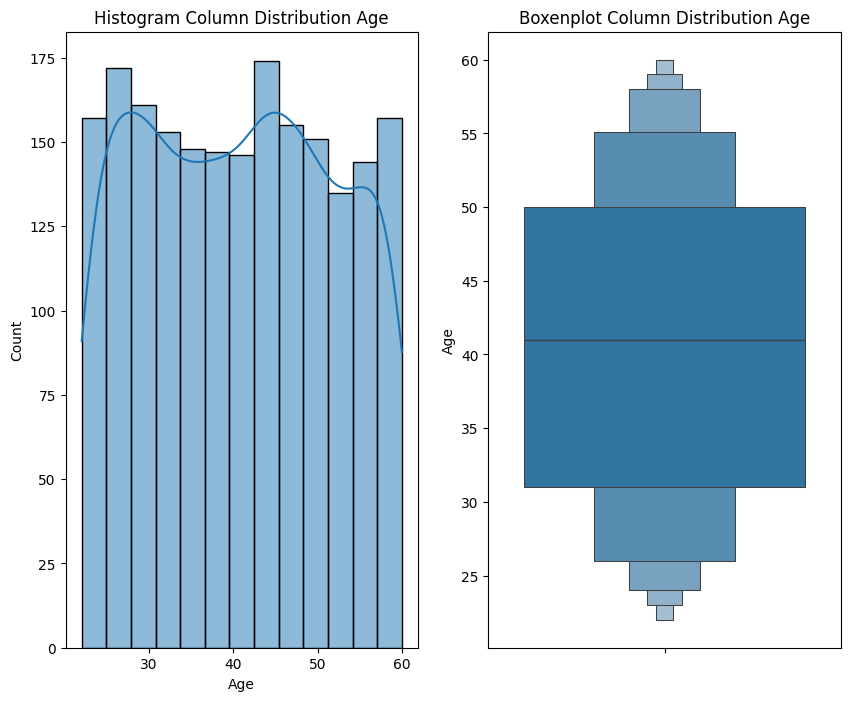

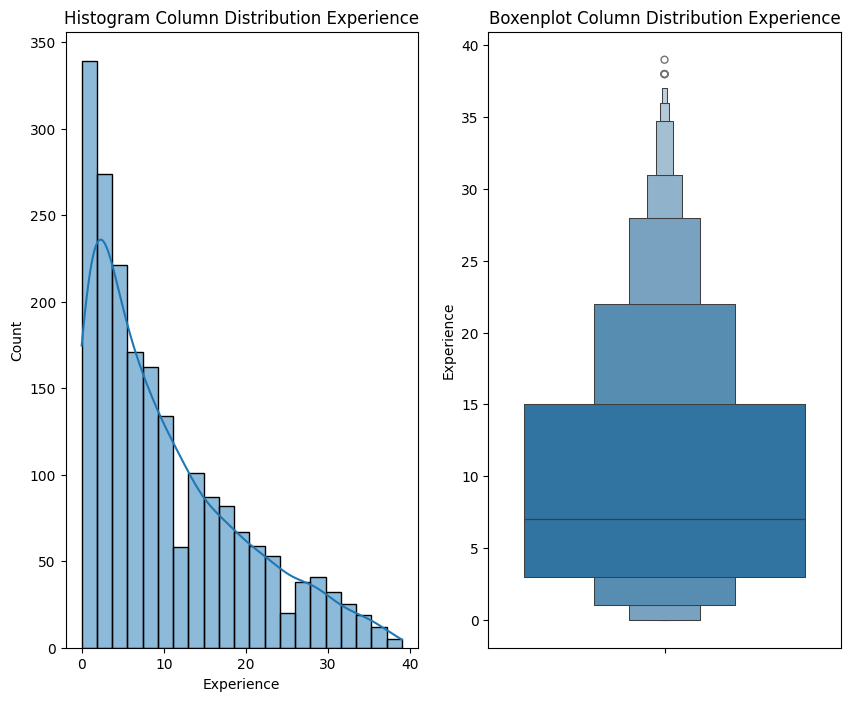

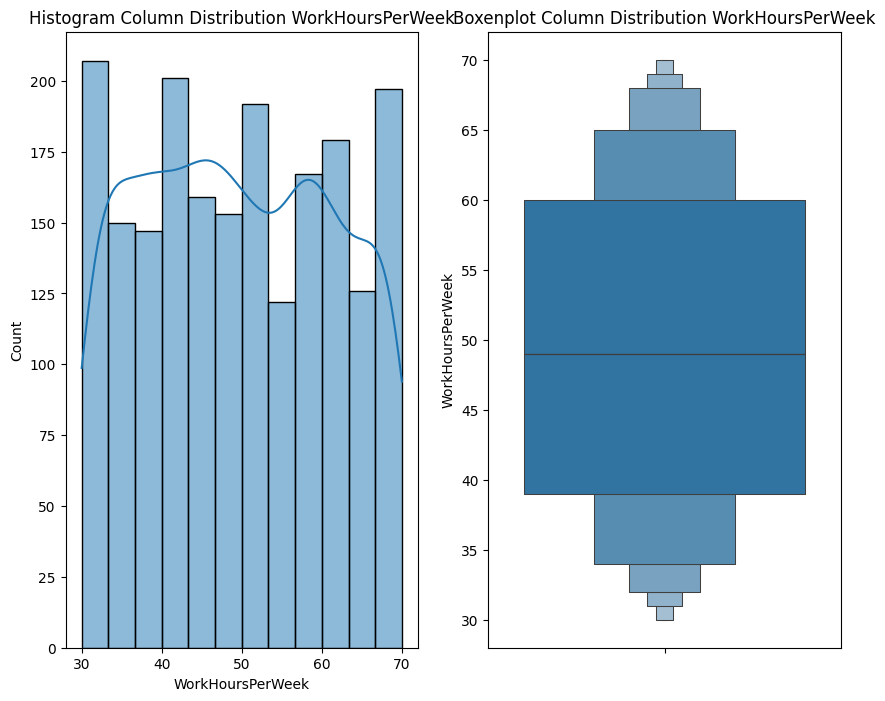

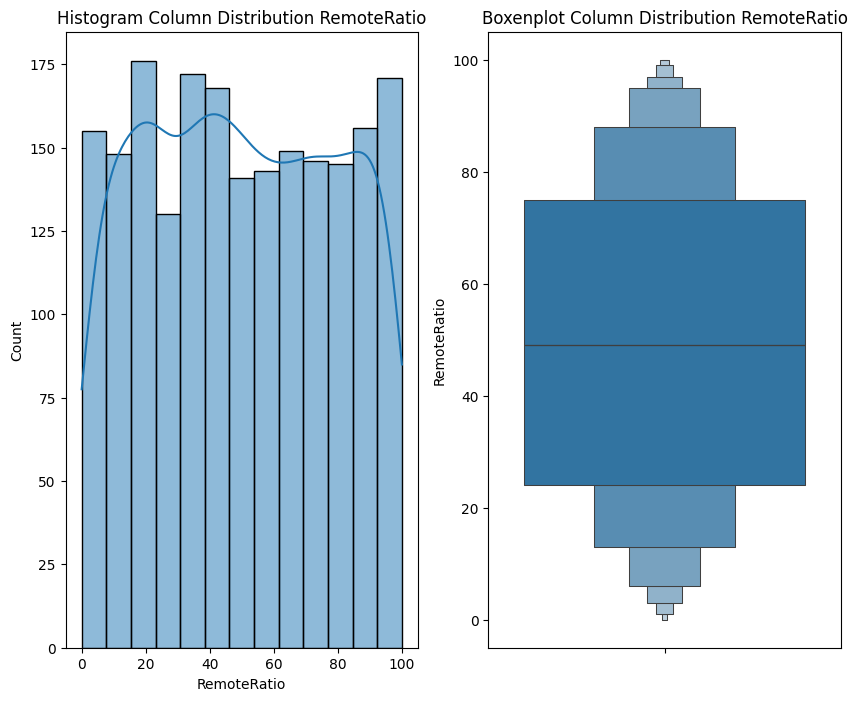

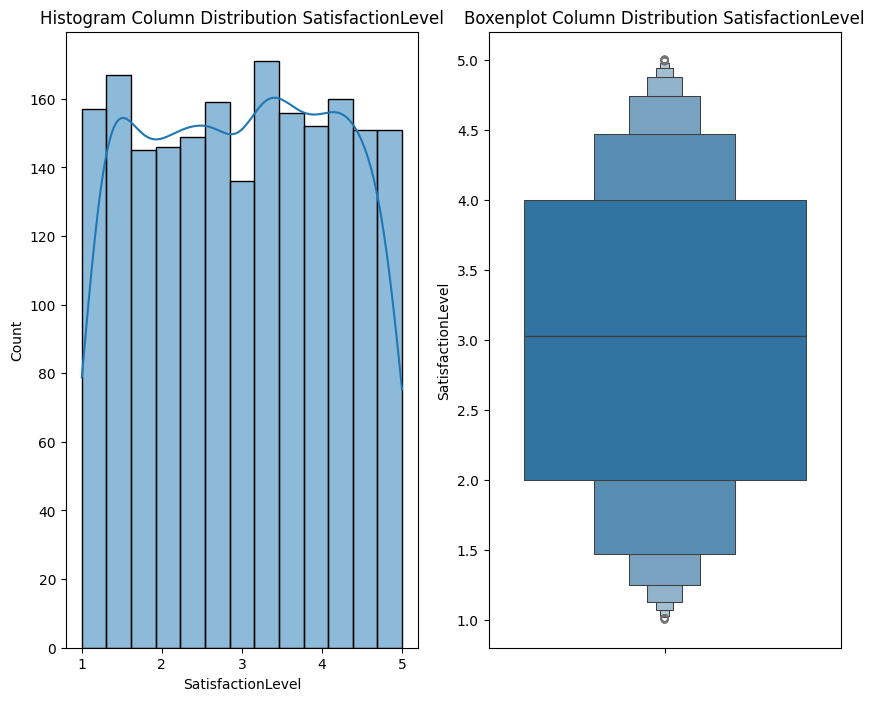

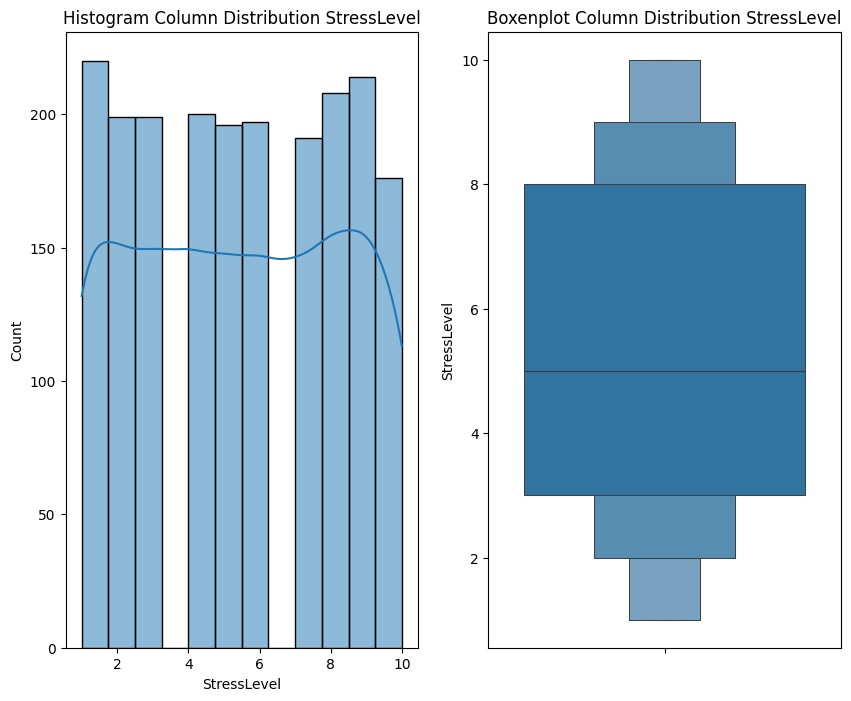

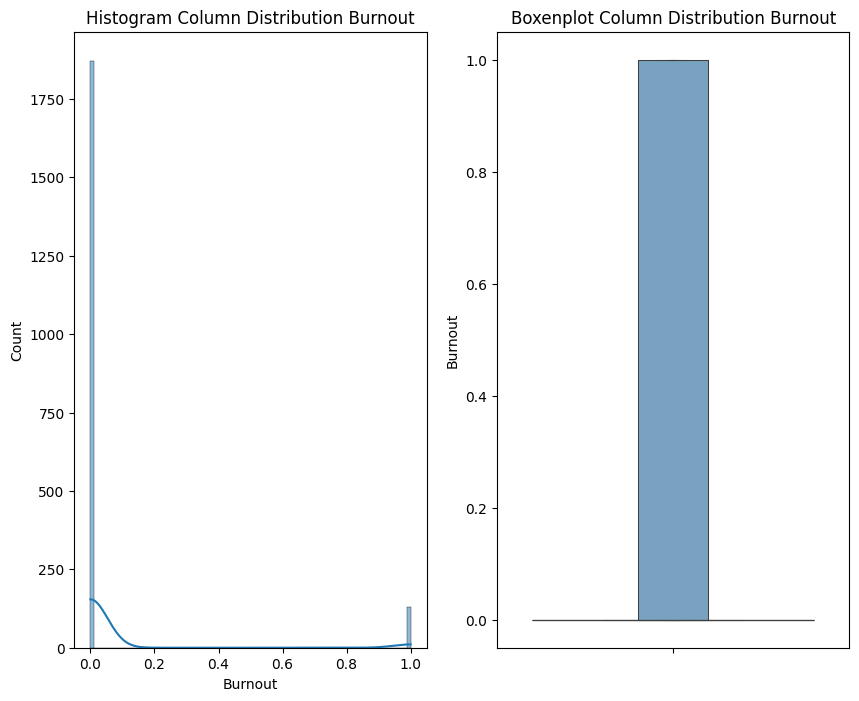

In [144]:
for col in df.select_dtypes(include='number'):
    fig, axes = plt.subplots(1, 2, figsize=(10, 8))
    sns.histplot(df[col], kde=True, ax = axes[0])
    axes[0].set_title(f"Histogram Column Distribution {col}")
    sns.boxenplot(df[col], ax = axes[1])
    axes[1].set_title(f"Boxenplot Column Distribution {col}")

## B. Data Preprocessing

### B.1 Drop Unrelated Columns

In [145]:
df_clean = df.drop(columns='Name')
df_clean.columns

Index(['Age', 'Gender', 'JobRole', 'Experience', 'WorkHoursPerWeek',
       'RemoteRatio', 'SatisfactionLevel', 'StressLevel', 'Burnout'],
      dtype='object')

### B.2 Mapping Feature

In [146]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [147]:
gender_mapping = {'Female' : 0, 'Male' : 1}
df_clean['Gender'] = df['Gender'].map(gender_mapping)

In [148]:
df['JobRole'].unique()

array(['Analyst', 'Engineer', 'Manager', 'Sales', 'HR'], dtype=object)

In [149]:
jobrole_mapping = {'Analyst' : 0, 'Engineer' : 1, 'Manager' : 2, 'Sales' : 3, 'HR' : 4}
df_clean['JobRole'] = df['JobRole'].map(jobrole_mapping)

In [150]:
df_clean.head()

,Age,Gender,JobRole,Experience,WorkHoursPerWeek,RemoteRatio,SatisfactionLevel,StressLevel,Burnout
0,32,1,0,3,60,21,4.40,1,0
1,40,0,1,9,47,67,2.09,2,0
2,33,0,1,2,44,20,2.58,3,0
3,35,0,2,6,44,70,3.23,8,0
4,59,1,3,8,38,46,4.41,1,0


### B.3 Feature Engineering

#### Add New Columns

Stress Work Load

In [151]:
df_clean['StressWorkLoad'] = df_clean['StressLevel'] * df_clean['WorkHoursPerWeek']

In [152]:
df_clean.head()

,Age,Gender,JobRole,Experience,WorkHoursPerWeek,RemoteRatio,SatisfactionLevel,StressLevel,Burnout,StressWorkLoad
0,32,1,0,3,60,21,4.40,1,0,60
1,40,0,1,9,47,67,2.09,2,0,94
2,33,0,1,2,44,20,2.58,3,0,132
3,35,0,2,6,44,70,3.23,8,0,352
4,59,1,3,8,38,46,4.41,1,0,38


Despair Index

In [153]:
df_clean['DespairIndex'] = df_clean['StressLevel'] / df_clean['SatisfactionLevel'] + 0.01

In [154]:
df_clean.head()

,Age,Gender,JobRole,Experience,WorkHoursPerWeek,RemoteRatio,SatisfactionLevel,StressLevel,Burnout,StressWorkLoad,DespairIndex
0,32,1,0,3,60,21,4.40,1,0,60,0.237273
1,40,0,1,9,47,67,2.09,2,0,94,0.966938
2,33,0,1,2,44,20,2.58,3,0,132,1.172791
3,35,0,2,6,44,70,3.23,8,0,352,2.486780
4,59,1,3,8,38,46,4.41,1,0,38,0.236757


## C. Exploratory Data Analysis (EDA)

### C.1 Univariate Analysis

#### Label Distributions

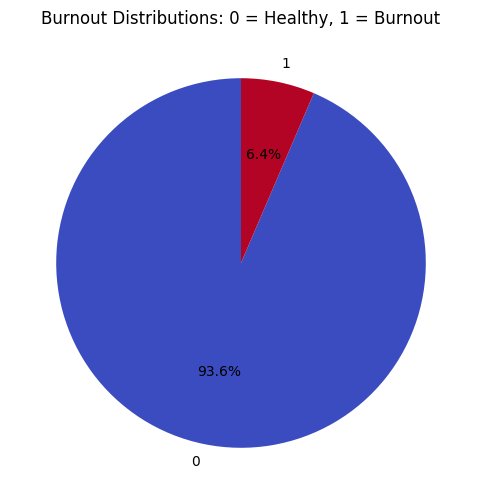

In [155]:
plt.figure(figsize=(6, 6))
df_clean['Burnout'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='coolwarm')
plt.title('Burnout Distributions: 0 = Healthy, 1 = Burnout')
plt.ylabel(None)
plt.show()

#### Employee Working Hours Distributions

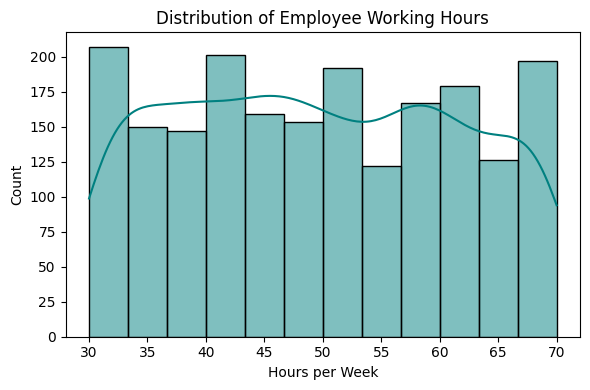

In [156]:
plt.figure(figsize=(6, 4))
sns.histplot(df_clean['WorkHoursPerWeek'], kde=True, color='teal')
plt.title("Distribution of Employee Working Hours")
plt.xlabel("Hours per Week")

plt.tight_layout()
plt.show()

### C.2 Bivariate Analysis

#### Stress, Satisfaction, Work Hours

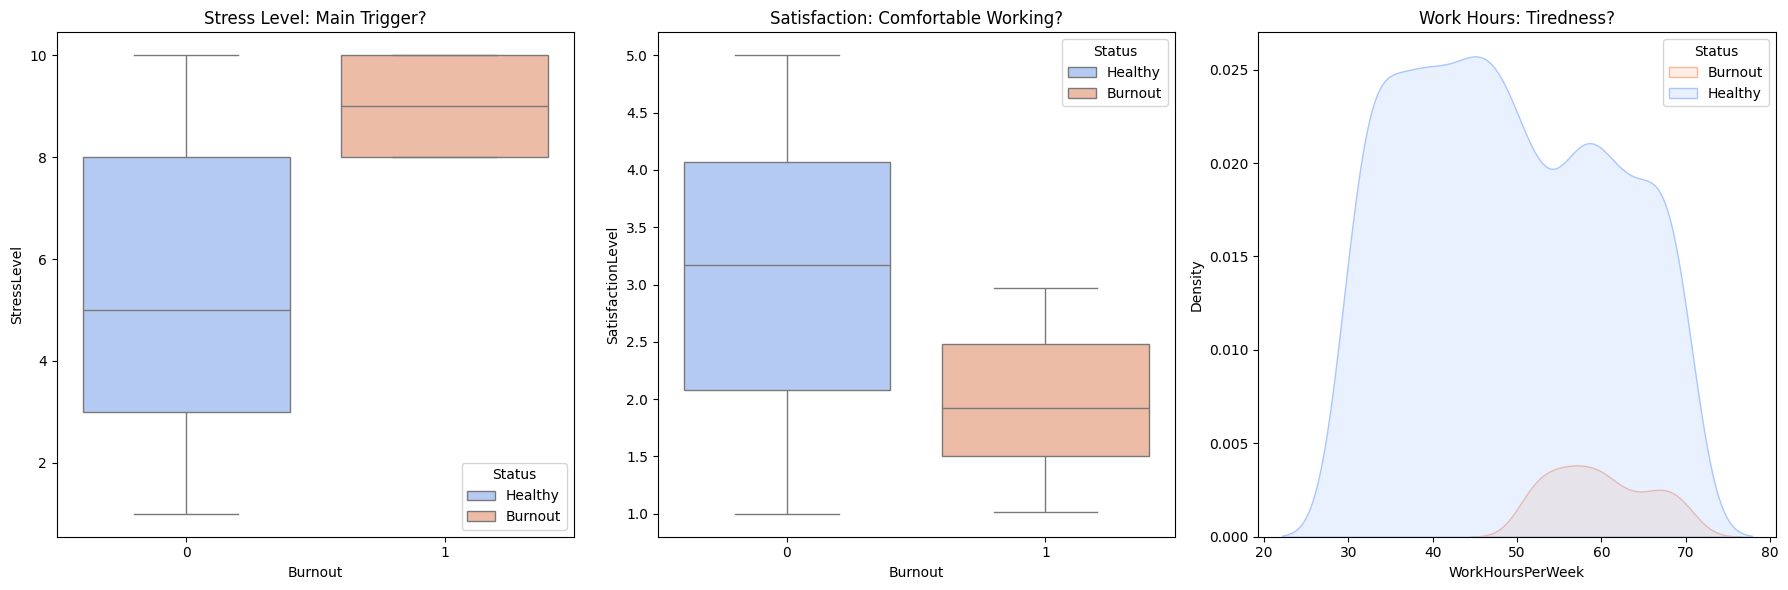

In [157]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Stress vs Burnout (Boxplot)
sns.boxplot(x='Burnout', y='StressLevel', hue='Burnout', data=df_clean, palette='coolwarm', ax=axes[0])
axes[0].set_title("Stress Level: Main Trigger?")
axes[0].legend(title='Status', labels=['Healthy', 'Burnout'])

# Plot 2: Satisfaction vs Burnout (Boxplot)
sns.boxplot(x='Burnout', y='SatisfactionLevel', hue='Burnout', data=df_clean, palette='coolwarm', ax=axes[1])
axes[1].set_title("Satisfaction: Comfortable Working?")
axes[1].legend(title='Status', labels=['Healthy', 'Burnout'])

# Plot 3: Work Hours vs Burnout (KDE Plot)
sns.kdeplot(x='WorkHoursPerWeek', hue='Burnout', data=df_clean, fill=True, palette='coolwarm', ax=axes[2])
axes[2].set_title("Work Hours: Tiredness?")
axes[2].legend(title='Status', labels=['Burnout', 'Healthy'])

plt.tight_layout()
plt.show()

#### Despair Index, Stress Work Load

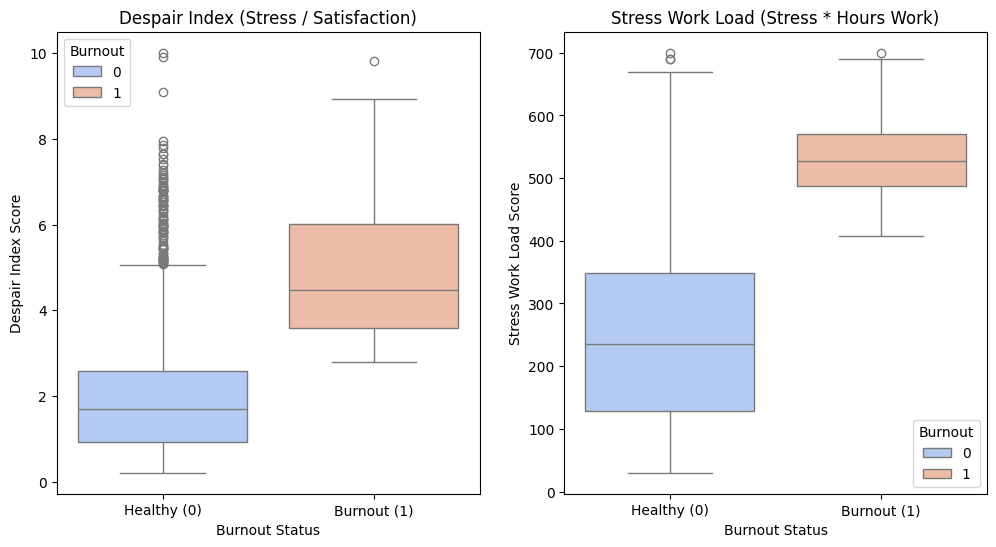

In [158]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(x='Burnout', y='DespairIndex', hue='Burnout', data=df_clean, palette='coolwarm', ax=axes[0])
axes[0].set_title("Despair Index (Stress / Satisfaction)")
axes[0].set_xlabel("Burnout Status")
axes[0].set_ylabel("Despair Index Score")
axes[0].set_xticks([0, 1], ['Healthy (0)', 'Burnout (1)'])


sns.boxplot(x='Burnout', y='StressWorkLoad', hue='Burnout', data=df_clean, palette='coolwarm', ax=axes[1])
axes[1].set_title("Stress Work Load (Stress * Hours Work)")
axes[1].set_xlabel("Burnout Status")
axes[1].set_ylabel("Stress Work Load Score")
axes[1].set_xticks([0, 1], ['Healthy (0)', 'Burnout (1)'])

plt.show()

### C.3 Multivariate Analysis

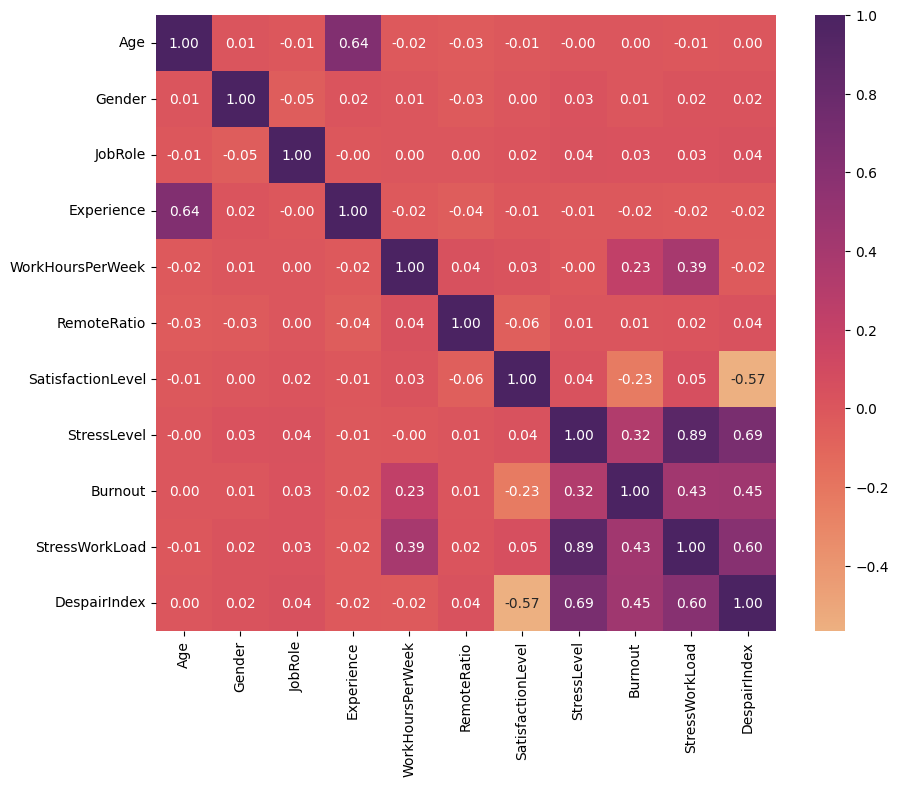

In [159]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean.corr(), annot=True, cmap='flare', fmt='.2f')
plt.show()

## D. Modelling

### D.1 Defining X (Features) and y (Target) Variables

In [160]:
X_data = df_clean.drop(columns=['Burnout'])
y_data = df_clean['Burnout']

### D.2 Splitting Train Data and Test Data (80:20)

In [161]:
def stratified_split(x_data, y_data, train_size = 0.8, random_state = 42):
    np.random.seed(random_state)
    
    x_train_list, x_test_list = [], []
    y_train_list, y_test_list = [], []
    
    for class_value in np.unique(y_data):
        class_idx = np.where(y_data == class_value)[0]
        
        idx = np.random.permutation(class_idx)
        split_ratio = int(len(idx) * train_size)
        
        x_train_list.append(x_data.iloc[idx[:split_ratio]])
        x_test_list.append(x_data.iloc[idx[split_ratio:]])
        y_train_list.append(y_data.iloc[idx[:split_ratio]])
        y_test_list.append(y_data.iloc[idx[split_ratio:]])
        
    x_train = pd.concat(x_train_list).reset_index(drop = True)
    x_test = pd.concat(x_test_list).reset_index(drop = True)
    y_train = pd.concat(y_train_list).reset_index(drop = True)
    y_test = pd.concat(y_test_list).reset_index(drop = True)
    
    return x_train, x_test, y_train, y_test
X_train, X_test, y_train, y_test = stratified_split(X_data, y_data)

### D.3 Feature Scaling

#### Standard Scale Continous Data (Non-Categorical)

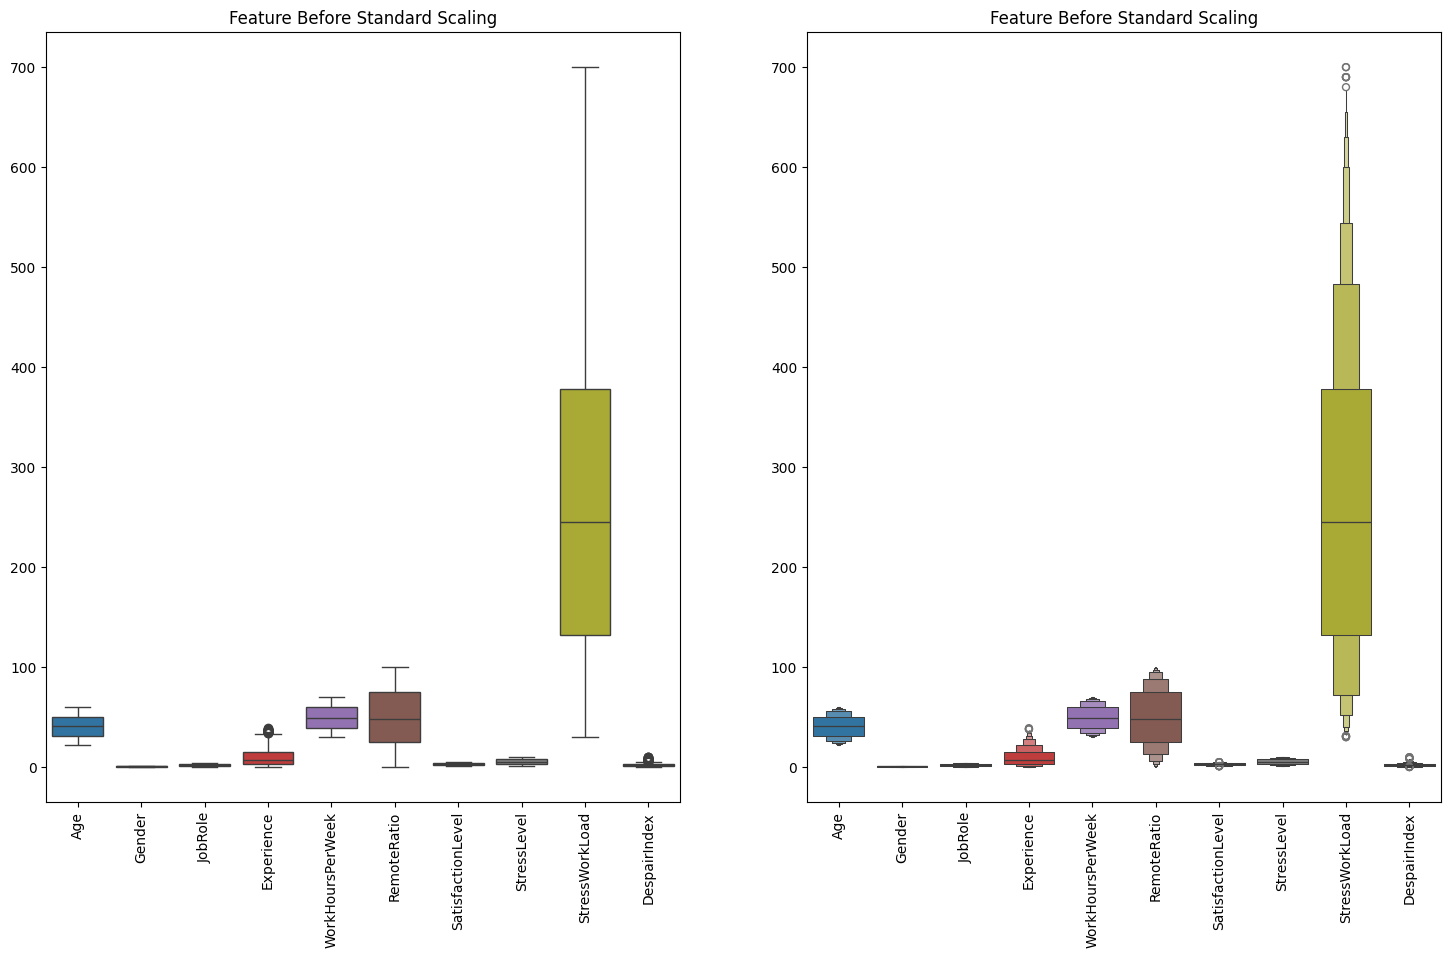

In [162]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

sns.boxplot(X_train, ax=axes[0])
axes[0].set_title("Feature Before Standard Scaling")
axes[0].tick_params(axis='x', rotation=90)

sns.boxenplot(X_train, ax=axes[1])
axes[1].set_title("Feature Before Standard Scaling")
axes[1].tick_params(axis='x', rotation=90)

In [163]:
train_mean = X_train.mean(axis=0)
train_std  = X_train.std(axis=0)

X_train = (X_train - train_mean) / train_std
X_test = (X_test - train_mean) / train_std

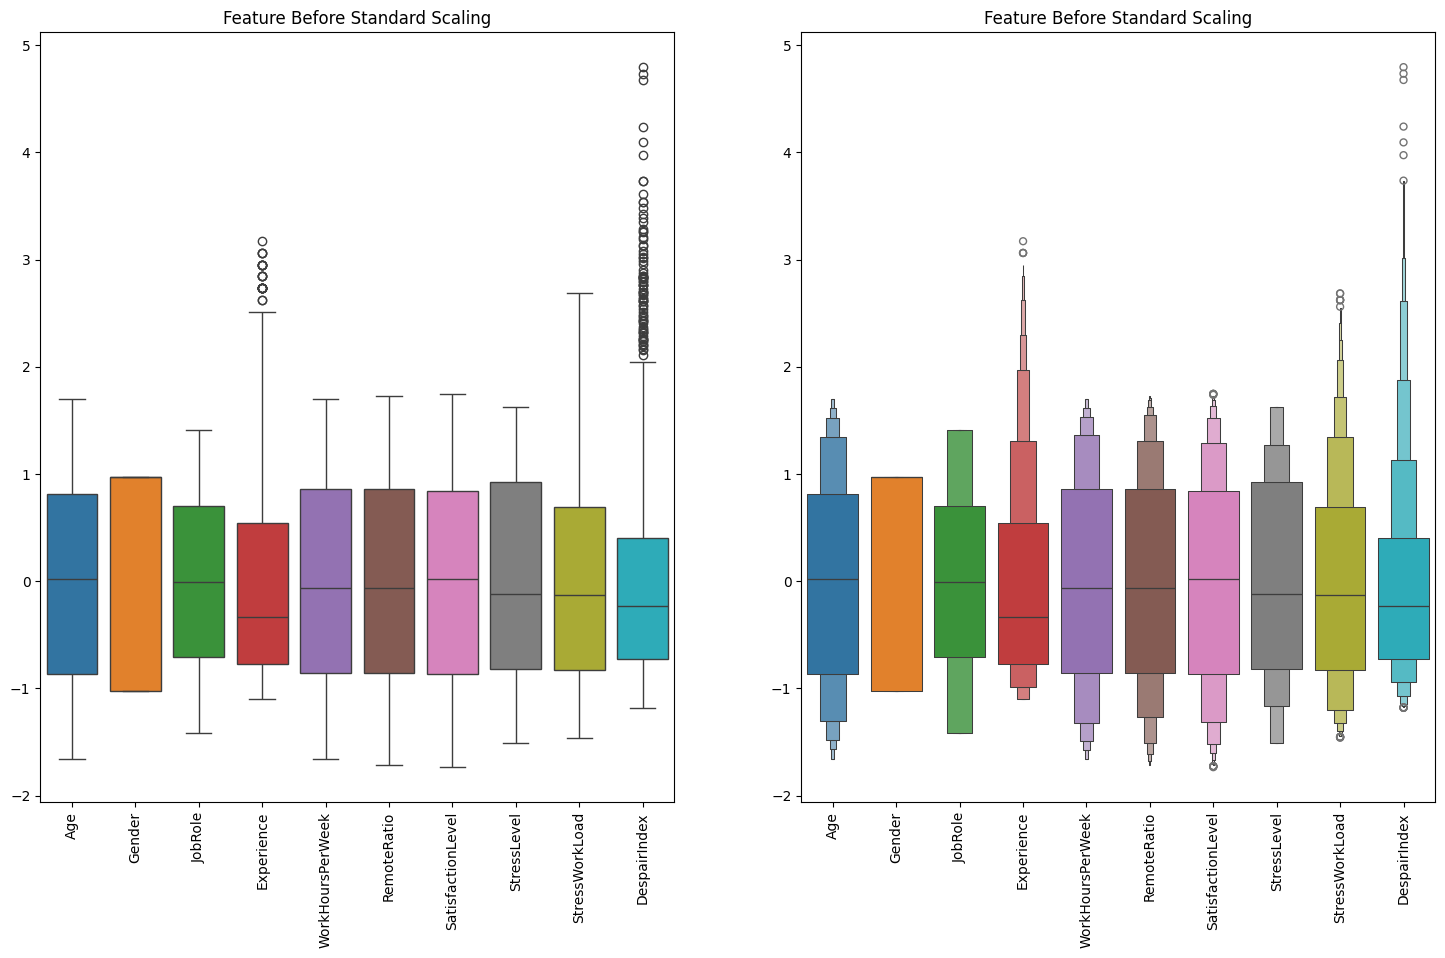

In [164]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

sns.boxplot(X_train, ax=axes[0])
axes[0].set_title("Feature Before Standard Scaling")
axes[0].tick_params(axis='x', rotation=90)

sns.boxenplot(X_train, ax=axes[1])
axes[1].set_title("Feature Before Standard Scaling")
axes[1].tick_params(axis='x', rotation=90)

### D.4 Support Vector Machine

In [165]:
class SVMManual:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        # Ensure inputs are numpy arrays
        X = np.array(X)
        y = np.array(y)
        
        # Convert labels: 0 -> -1 (SVM needs -1 and 1 targets)
        y_ = np.where(y <= 0, -1, 1)
        
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                # Hinge Loss Condition
                condition = y_[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                
                if condition:
                    # Update weights (Regularization only)
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    # Update weights & bias (Regularization + Loss)
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b += self.lr * y_[idx]

    def predict(self, X):
        X = np.array(X)
        linear_output = np.dot(X, self.w) + self.b
        pred = np.sign(linear_output)
        
        # Convert back: -1 -> 0 to match original labels
        return np.where(pred == -1, 0, 1)

### D.5 Validation Curve (Finding Best Gap)

Starting Lambda Tuning...
Testing Lambda: 0.0001
Testing Lambda: 0.001
Testing Lambda: 0.01
Testing Lambda: 0.1
Testing Lambda: 1.0


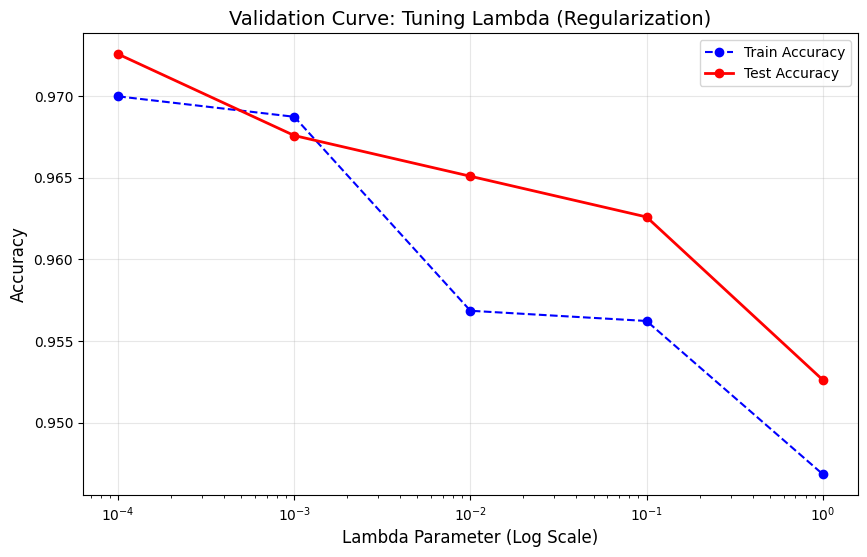

Best Lambda: 0.0001 with Acc: 0.9726


In [166]:
import matplotlib.pyplot as plt

# --- 1. Setup Tuning ---
lambda_values = [0.0001, 0.001, 0.01, 0.1, 1.0]

train_accuracies = []
test_accuracies = []

X_train_np = X_train
y_train_np = y_train
X_test_np = X_test
y_test_np = y_test

print("Starting Lambda Tuning...")

for l in lambda_values:
    print(f"Testing Lambda: {l}")
    
    # Init model with specific lambda
    model = SVMManual(learning_rate=0.001, lambda_param=l, n_iters=1000)
    model.fit(X_train_np, y_train_np)
    
    # Train Acc
    train_pred = model.predict(X_train_np)
    train_acc = np.mean(train_pred == y_train_np)
    train_accuracies.append(train_acc)
    
    # Test Acc
    test_pred = model.predict(X_test_np)
    test_acc = np.mean(test_pred == y_test_np)
    test_accuracies.append(test_acc)

# --- 2. Visualization ---
plt.figure(figsize=(10, 6))

# Use semilogx because lambda varies by powers of 10
plt.semilogx(lambda_values, train_accuracies, marker='o', linestyle='--', color='blue', label='Train Accuracy')
plt.semilogx(lambda_values, test_accuracies, marker='o', linewidth=2, color='red', label='Test Accuracy')

plt.title('Validation Curve: Tuning Lambda (Regularization)', fontsize=14)
plt.xlabel('Lambda Parameter (Log Scale)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Find best lambda
best_idx = np.argmax(test_accuracies)
print(f"Best Lambda: {lambda_values[best_idx]} with Acc: {test_accuracies[best_idx]:.4f}")

### D.6 Model Prediction (With Best Lambda)

In [167]:
model = SVMManual(learning_rate=0.001, lambda_param=0.0001, n_iters=1000)
model.fit(X_train, y_train)

test_predictions = model.predict(X_test)
train_predictions = model.predict(X_train)

## E. Evaluation